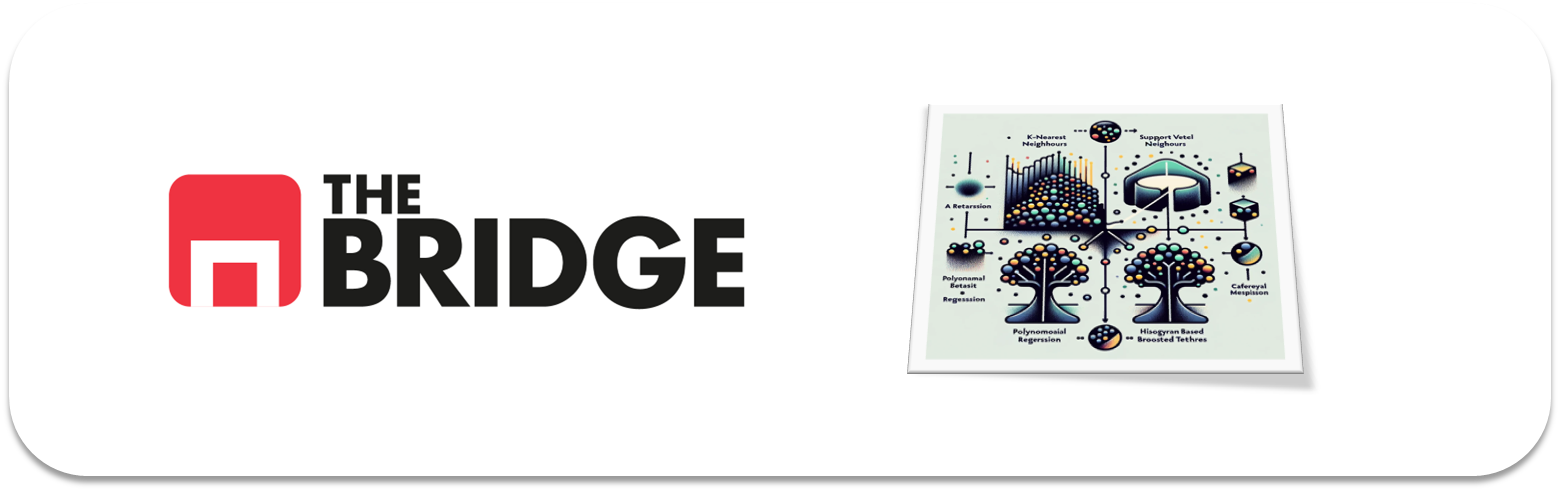

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, make_scorer, balanced_accuracy_score,accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE # Nuevos amigos para ayudaros
from imblearn.under_sampling import RandomUnderSampler # Nuevos amigos para ayudarnos
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [66]:
df = pd.read_csv('./data/credit_npo.csv')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [67]:
df.describe(include="all")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,11816.000000,12537.000000,12537.000000,12537.000000,12537.000000,12360.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,0.822087
std,0.253321,0.368148,15.077498,4.055787,9.122216,11855.905437,5.165422,4.035658,1.134325,4.018873,1.136802
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8300.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

la variable target es: "SeriousDlqin2yrs" y estamos tratando con un problema de clasificación binaria, que podemos analizar con un algoritmo KNNN          

In [69]:
target = 'SeriousDlqin2yrs'

### #1.3
Pinta la distribución de frecuencias del target y coméntala

<Axes: xlabel='SeriousDlqin2yrs', ylabel='Count'>

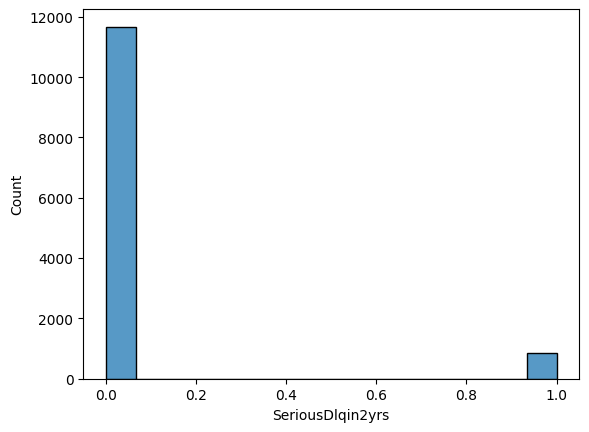

In [70]:
sns.histplot(df['SeriousDlqin2yrs'])

In [71]:
df['SeriousDlqin2yrs'].value_counts(normalize=True)

SeriousDlqin2yrs
0    0.931084
1    0.068916
Name: proportion, dtype: float64

Descripción textual de las variables

    SeriousDlqin2yrs:
        Descripción: Variable binaria que indica si un cliente ha tenido un incumplimiento grave en los últimos 2 años.
        Valores posibles: 0 (sin incumplimiento), 1 (con incumplimiento).
        Tipo: Categórica.

    RevolvingUtilizationOfUnsecuredLines:
        Descripción: Relación de utilización de crédito en líneas de crédito no garantizadas.
        Rango típico: 0 a 1 (puede superar 1 si el cliente tiene más saldo adeudado que el límite de crédito).
        Tipo: Numérica (continua).

    age:
        Descripción: Edad del cliente en años.
        Valores posibles: Enteros positivos.
        Tipo: Numérica (discreta).

    NumberOfTime30-59DaysPastDueNotWorse:
        Descripción: Número de veces que el cliente ha estado 30-59 días atrasado en sus pagos.
        Valores posibles: Enteros no negativos.
        Tipo: Numérica (discreta).

    DebtRatio:
        Descripción: Relación entre deuda total mensual e ingreso mensual.
        Rango típico: 0 a valores altos (puede exceder 1 si los gastos son mayores que los ingresos).
        Tipo: Numérica (continua).

    MonthlyIncome:
        Descripción: Ingreso mensual del cliente en unidades monetarias.
        Valores posibles: Decimales o enteros positivos.
        Tipo: Numérica (continua).

    NumberOfOpenCreditLinesAndLoans:
        Descripción: Número total de líneas de crédito y préstamos abiertos.
        Valores posibles: Enteros no negativos.
        Tipo: Numérica (discreta).

    NumberOfTimes90DaysLate:
        Descripción: Número de veces que el cliente ha estado 90 o más días atrasado en sus pagos.
        Valores posibles: Enteros no negativos.
        Tipo: Numérica (discreta).

    NumberRealEstateLoansOrLines:
        Descripción: Número de préstamos o líneas de crédito relacionadas con bienes raíces.
        Valores posibles: Enteros no negativos.
        Tipo: Numérica (discreta).

    NumberOfTime60-89DaysPastDueNotWorse:
        Descripción: Número de veces que el cliente ha estado 60-89 días atrasado en sus pagos.
        Valores posibles: Enteros no negativos.
        Tipo: Numérica (discreta).

    NumberOfDependents:
        Descripción: Número de dependientes económicos del cliente (por ejemplo, hijos o personas a cargo).
        Valores posibles: Enteros o decimales positivos (aunque los decimales podrían ser errores).
        Tipo: Numérica (discreta).

Clasificación de las variables

    Variables categóricas:
        SeriousDlqin2yrs (Binaria, clasifica incumplimiento).

    Variables numéricas:
        Numéricas continuas:
            RevolvingUtilizationOfUnsecuredLines
            DebtRatio
            MonthlyIncome
        Numéricas discretas:
            age
            NumberOfTime30-59DaysPastDueNotWorse
            NumberOfOpenCreditLinesAndLoans
            NumberOfTimes90DaysLate
            NumberRealEstateLoansOrLines
            NumberOfTime60-89DaysPastDueNotWorse
            NumberOfDependents

In [72]:
features_num = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [73]:
df.dropna(inplace=True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=[target]), df[target], test_size=0.2, random_state=42)

### SOBREMUESTREO

In [76]:
y_train.value_counts(normalize=True)

SeriousDlqin2yrs
0    0.929856
1    0.070144
Name: proportion, dtype: float64

<Axes: xlabel='SeriousDlqin2yrs', ylabel='Count'>

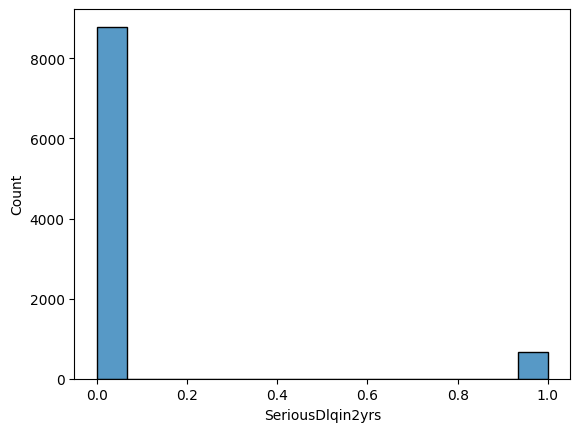

In [77]:
sns.histplot(y_train)

<Axes: ylabel='MonthlyIncome'>

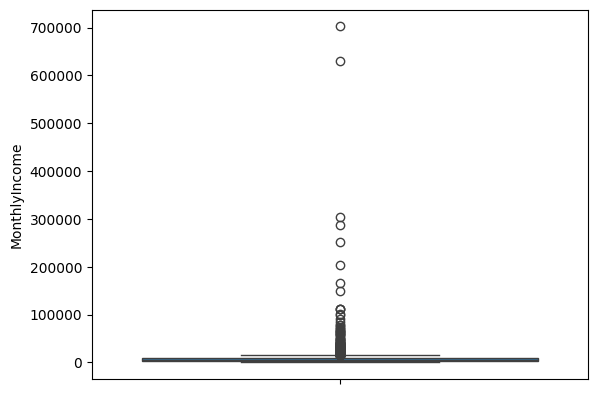

In [78]:
sns.boxplot(X_train['MonthlyIncome'])

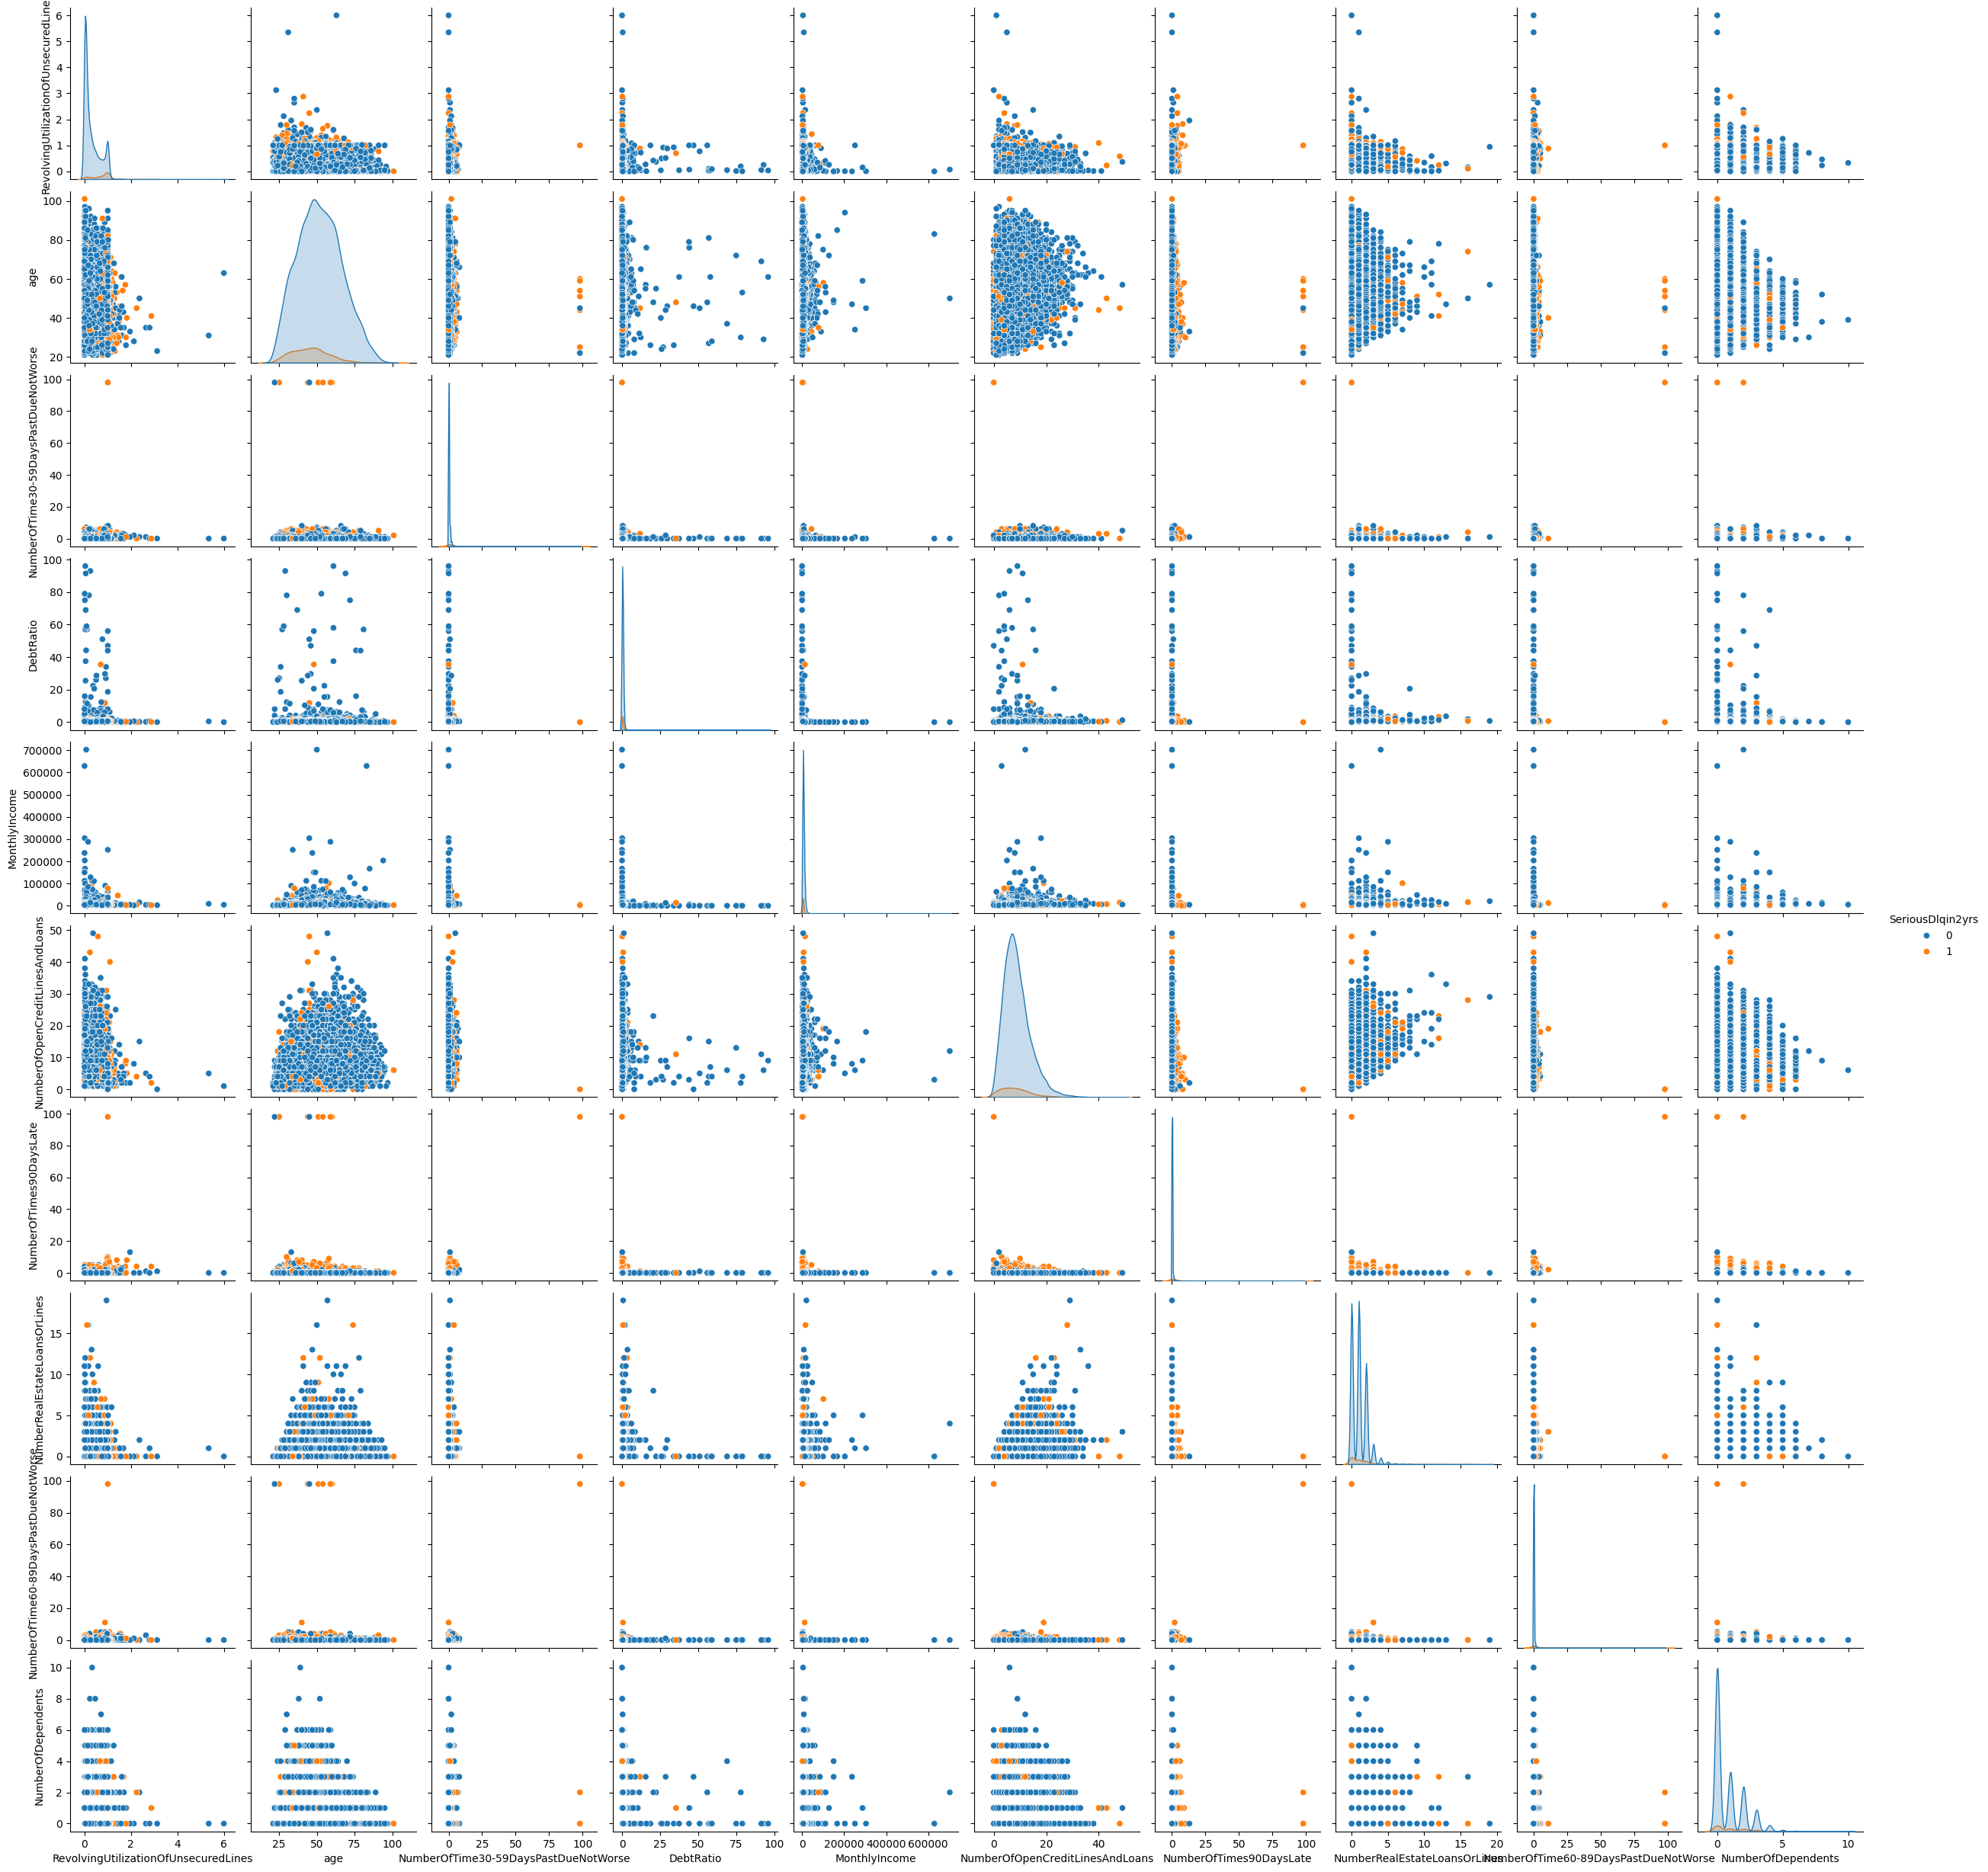

In [79]:
sns.pairplot(df, hue=target)

In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
# Modelos iniciales
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(max_depth=5, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Evaluar cada modelo con validación cruzada (macro recall)
results = {}
for name, model in models.items():
    if name == 'KNN':  # Usar datos estandarizados para KNN y Logistic Regression
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='recall_macro')
    else:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall_macro')
    results[name] = scores.mean()

# Mostrar resultados iniciales
print("Resultados iniciales (macro recall):")
for name, score in results.items():
    print(f"{name}: {score:.4f}")

c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Resultados iniciales (macro recall):
KNN: 0.5635
Random Forest: 0.5529
Logistic Regression: 0.5428


c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de hiperparámetros para KNN
param_grid_knn = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
}

# GridSearch para KNN
grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    scoring='recall_macro',
    cv=5,
    n_jobs=-1
)
grid_knn.fit(X_train_scaled, y_train)

# Mejor combinación de hiperparámetros y puntaje
print("Mejor combinación de hiperparámetros para KNN:", grid_knn.best_params_)
print("Mejor recall_macro para KNN:", grid_knn.best_score_)


Mejor combinación de hiperparámetros para KNN: {'n_neighbors': 1, 'weights': 'uniform'}
Mejor recall_macro para KNN: 0.5883005830000856


In [83]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    scoring='recall_macro',
    cv=5,
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

print("Mejor combinación de hiperparámetros para Random Forest:", grid_rf.best_params_)
print("Mejor recall_macro para Random Forest:", grid_rf.best_score_)


Mejor combinación de hiperparámetros para Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Mejor recall_macro para Random Forest: 0.5966792759892321


In [84]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']  # Regularización L2
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid_lr,
    scoring='recall_macro',
    cv=5,
    n_jobs=-1
)
grid_lr.fit(X_train_scaled, y_train)

print("Mejor combinación de hiperparámetros para Logistic Regression:", grid_lr.best_params_)
print("Mejor recall_macro para Logistic Regression:", grid_lr.best_score_)


Mejor combinación de hiperparámetros para Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Mejor recall_macro para Logistic Regression: 0.5398972403597696


In [85]:
# Entrenar el mejor modelo en todo el conjunto de entrenamiento
best_model = grid_knn.best_estimator_  # Cambia esto según el modelo ganador
best_model.fit(X_train_scaled, y_train)

# Predicciones
y_test_pred = best_model.predict(X_test_scaled)

# Métricas finales
from sklearn.metrics import classification_report
print("Mejor modelo seleccionado:", best_model)
print("\nReporte de clasificación (test set):")
print(classification_report(y_test, y_test_pred))


Mejor modelo seleccionado: KNeighborsClassifier(n_neighbors=1)

Reporte de clasificación (test set):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2197
           1       0.27      0.19      0.22       167

    accuracy                           0.91      2364
   macro avg       0.61      0.58      0.59      2364
weighted avg       0.89      0.91      0.90      2364



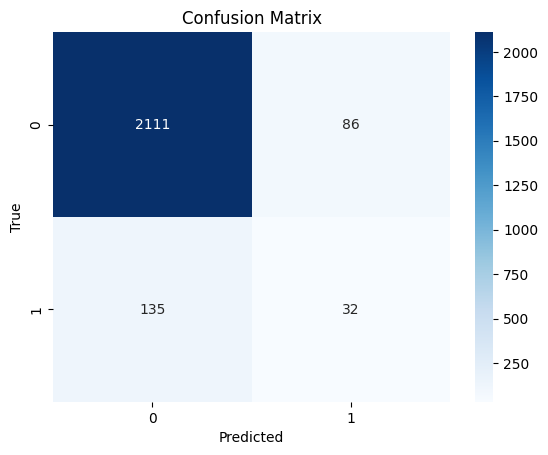

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [118]:
# Obtener las importancias de las características
# Obtener el mejor modelo después de la búsqueda
best_rf_model = grid_rf.best_estimator_

# Obtener las importancias de las características
importances = best_rf_model.feature_importances_

# Crear un DataFrame con las importancias
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Ordenar por importancia descendente
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print("Importancia de las características:")
print(feature_importance)

# Filtrar las características con importancia mayor o igual a 0.1
important_features = feature_importance[feature_importance['Importance'] >= 0.15]

# Mostrar las características seleccionadas
print("\n Características con importancia mayor o igual a 0.1:")
print(important_features)

Importancia de las características:
                                Feature  Importance
0  RevolvingUtilizationOfUnsecuredLines    0.205636
6               NumberOfTimes90DaysLate    0.163390
3                             DebtRatio    0.133946
4                         MonthlyIncome    0.126341
1                                   age    0.098019
5       NumberOfOpenCreditLinesAndLoans    0.081163
2  NumberOfTime30-59DaysPastDueNotWorse    0.067396
8  NumberOfTime60-89DaysPastDueNotWorse    0.055399
9                    NumberOfDependents    0.034472
7          NumberRealEstateLoansOrLines    0.034238

 Características con importancia mayor o igual a 0.1:
                                Feature  Importance
0  RevolvingUtilizationOfUnsecuredLines    0.205636
6               NumberOfTimes90DaysLate    0.163390


In [127]:
# Asegurarse de que X_train_scaled y X_test_scaled son DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Filtrar las características con importancia mayor o igual a 0.15
important_features = feature_importance[feature_importance['Importance'] >= 0.1]

# Obtener los nombres de las características importantes
important_columns = important_features['Feature'].tolist()

# Filtrar X_train_scaled y X_test_scaled usando las características importantes
X_train_filtered = X_train_scaled_df[important_columns]
X_test_filtered = X_test_scaled_df[important_columns]

# Mostrar las primeras filas de X_train_filtered y X_test_filtered para verificar
print("Primeras filas de X_train filtrado:")
print(X_train_filtered.head())

print("Primeras filas de X_test filtrado:")
print(X_test_filtered.head())


Primeras filas de X_train filtrado:
   RevolvingUtilizationOfUnsecuredLines  NumberOfTimes90DaysLate  DebtRatio  \
0                              0.154698                -0.062384   0.881104   
1                              1.577335                -0.062384  -0.064202   
2                              1.651001                -0.062384  -0.045353   
3                              1.442938                -0.062384   0.010001   
4                             -0.925438                -0.062384  -0.028696   

   MonthlyIncome  
0      -0.373806  
1      -0.029605  
2       0.110460  
3      -0.130639  
4      -0.135329  
Primeras filas de X_test filtrado:
   RevolvingUtilizationOfUnsecuredLines  NumberOfTimes90DaysLate  DebtRatio  \
0                             -0.520965                -0.062384  -0.157585   
1                             -0.925438                -0.062384  -0.194039   
2                              0.529781                 0.283657  -0.007389   
3                       

In [128]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de hiperparámetros para KNN
param_grid_knn = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
}

# GridSearch para KNN
grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    scoring='recall_macro',
    cv=5,
    n_jobs=-1
)
grid_knn.fit(X_train_filtered, y_train)

# Mejor combinación de hiperparámetros y puntaje
print("Mejor combinación de hiperparámetros para KNN:", grid_knn.best_params_)
print("Mejor recall_macro para KNN:", grid_knn.best_score_)


Mejor combinación de hiperparámetros para KNN: {'n_neighbors': 1, 'weights': 'uniform'}
Mejor recall_macro para KNN: 0.6032802254024067


In [129]:
# Entrenar el mejor modelo en todo el conjunto de entrenamiento
best_model = grid_knn.best_estimator_  # Cambia esto según el modelo ganador
best_model.fit(X_train_filtered, y_train)

# Predicciones
y_test_pred = best_model.predict(X_test_filtered)

# Métricas finales
from sklearn.metrics import classification_report
print("Mejor modelo seleccionado:", best_model)
print("\nReporte de clasificación (test set):")
print(classification_report(y_test, y_test_pred))

Mejor modelo seleccionado: KNeighborsClassifier(n_neighbors=1)

Reporte de clasificación (test set):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2197
           1       0.27      0.26      0.26       167

    accuracy                           0.90      2364
   macro avg       0.60      0.60      0.60      2364
weighted avg       0.90      0.90      0.90      2364



### SMOTE

In [161]:
from imblearn.over_sampling import SMOTE


# Aplicar SMOTE solo a los datos de entrenamiento
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_filtered, y_train)

# Definir el modelo con los mejores hiperparámetros encontrados anteriormente
logreg_best_model = LogisticRegression(max_iter=1000, C=1.0, solver='liblinear', penalty='l2', random_state=42)  # Ajusta según los mejores hiperparámetros

# Entrenar el modelo en los datos balanceados
logreg_best_model.fit(X_train_resampled, y_train_resampled)

# Predicciones en el conjunto de prueba original (sin aplicar SMOTE)
y_test_pred_smote_log = logreg_best_model.predict(X_test_filtered)

# Reporte de clasificación
print("Mejor modelo seleccionado: Logistic Regression")
print("\nReporte de clasificación (test set):")
print(classification_report(y_test, y_test_pred))


Mejor modelo seleccionado: Logistic Regression

Reporte de clasificación (test set):
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      2197
           1       0.19      0.69      0.29       167

    accuracy                           0.77      2364
   macro avg       0.58      0.73      0.58      2364
weighted avg       0.92      0.77      0.82      2364



In [162]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Aplicar SMOTE solo a los datos de entrenamiento
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_filtered, y_train)

# Definir el modelo con los mejores hiperparámetros encontrados anteriormente para Random Forest
smote_forest = RandomForestClassifier(
    n_estimators=200,  # Ajusta estos parámetros según los mejores valores encontrados
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=42
)

# Entrenar el modelo en los datos balanceados
smote_forest.fit(X_train_resampled, y_train_resampled)

# Predicciones en el conjunto de prueba original (sin aplicar SMOTE)
y_test_pred_smote_forest = smote_forest.predict(X_test_filtered)

# Reporte de clasificación
print("Mejor modelo seleccionado: Random Forest")
print("\nReporte de clasificación (test set):")
print(classification_report(y_test, y_test_pred))


Mejor modelo seleccionado: Random Forest

Reporte de clasificación (test set):
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      2197
           1       0.19      0.69      0.29       167

    accuracy                           0.77      2364
   macro avg       0.58      0.73      0.58      2364
weighted avg       0.92      0.77      0.82      2364



### UNDERSAMPLE

In [145]:
from imblearn.under_sampling import RandomUnderSampler

# Aplicar submuestreo a los datos de entrenamiento
under_sampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_filtered, y_train)

# Definir el modelo Random Forest con los mejores hiperparámetros encontrados
forest_under = RandomForestClassifier(
    n_estimators=200,  # Ajusta estos parámetros según los mejores valores encontrados
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=42
)

# Entrenar el modelo en los datos balanceados por submuestreo
forest_under.fit(X_train_resampled, y_train_resampled)

# Predicciones en el conjunto de prueba original (sin submuestreo)
y_test_pred = forest_under.predict(X_test_filtered)

# Reporte de clasificación
print("Mejor modelo seleccionado: Random Forest con submuestreo")
print("\nReporte de clasificación (test set):")
print(classification_report(y_test, y_test_pred))


Mejor modelo seleccionado: Random Forest con submuestreo

Reporte de clasificación (test set):
              precision    recall  f1-score   support

           0       0.97      0.72      0.83      2197
           1       0.16      0.68      0.25       167

    accuracy                           0.72      2364
   macro avg       0.56      0.70      0.54      2364
weighted avg       0.91      0.72      0.78      2364



In [146]:
from imblearn.under_sampling import RandomUnderSampler

# Aplicar submuestreo a los datos de entrenamiento
under_sampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_filtered, y_train)

# Definir el modelo Random Forest con los mejores hiperparámetros encontrados
logistic_under = LogisticRegression(max_iter=1000, C=1.0, solver='liblinear', penalty='l2', random_state=42)  # Ajusta según los mejores hiperparámetros

# Entrenar el modelo en los datos balanceados por submuestreo
logistic_under.fit(X_train_resampled, y_train_resampled)

# Predicciones en el conjunto de prueba original (sin submuestreo)
y_test_pred = logistic_under.predict(X_test_filtered)

# Reporte de clasificación
print("Mejor modelo seleccionado: Random Forest con submuestreo")
print("\nReporte de clasificación (test set):")
print(classification_report(y_test, y_test_pred))


Mejor modelo seleccionado: Random Forest con submuestreo

Reporte de clasificación (test set):
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      2197
           1       0.19      0.69      0.29       167

    accuracy                           0.77      2364
   macro avg       0.58      0.73      0.58      2364
weighted avg       0.92      0.77      0.82      2364



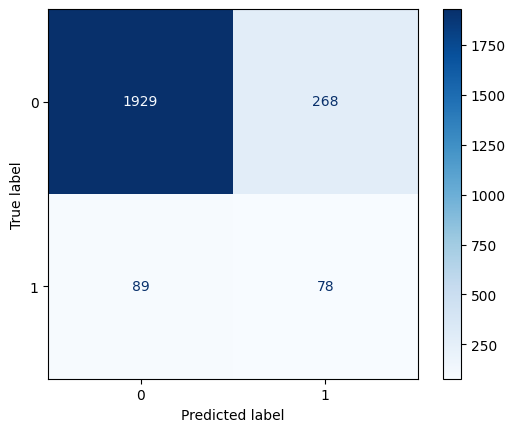

In [164]:

# Obtener las predicciones
y_pred_smote_forest = smote_forest.predict(X_test_filtered)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_smote_forest)

# Visualizar la matriz de confusión
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
cm_display.plot(cmap='Blues')


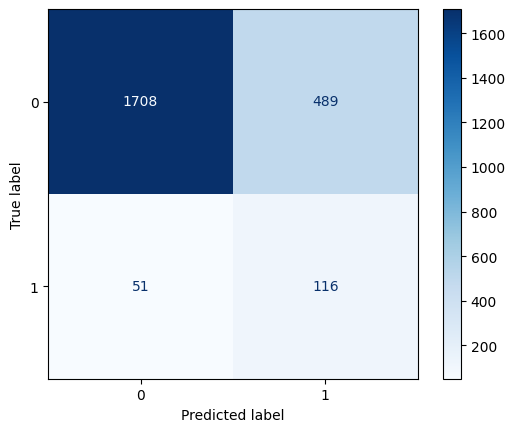

In [159]:

# Obtener las predicciones
y_pred_logreg_smote= logreg_best_model.predict(X_test_filtered)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_logreg_smote)

# Visualizar la matriz de confusión
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
cm_display.plot(cmap='Blues')